In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('C:/Users/kamil/ds-takehome/data/credit_scoring.csv', delimiter=';')

#### A. EDA (Exploratory Data Analysis)

In [53]:
# Structure checking
print("Shape", df.shape)
print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

Shape (6000, 9)

Data Types:
application_id         int64
age                    int64
monthly_income         int64
loan_amount            int64
previous_defaults      int64
credit_score           int64
default                int64
leak_col_good          int64
leak_col_subtle      float64
dtype: object

Missing Values:
application_id       0
age                  0
monthly_income       0
loan_amount          0
previous_defaults    0
credit_score         0
default              0
leak_col_good        0
leak_col_subtle      0
dtype: int64


In [54]:
# Data preview
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   application_id  age  monthly_income  loan_amount  previous_defaults  \
0          501000   41        13995609      5982664                  0   
1          501001   58        13683833      3711198                  0   
2          501002   33         9417391      7172332                  0   
3          501003   45         6861811      8661056                  0   
4          501004   22         5640742      4520669                  1   

   credit_score  default  leak_col_good  leak_col_subtle  
0           624        0              0           -0.040  
1           809        0              0            0.001  
2           647        0              0            0.077  
3           450        0              0            0.038  
4           816        0              0            0.020  


In [55]:
# Descriptive statistic numeric
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       application_id          age  monthly_income   loan_amount  \
count     6000.000000  6000.000000    6.000000e+03  6.000000e+03   
mean    503999.500000    40.321500    1.140386e+07  8.001122e+06   
std       1732.195139    11.300697    4.912598e+06  4.071786e+06   
min     501000.000000    21.000000    3.000310e+06  1.000794e+06   
25%     502499.750000    31.000000    7.163379e+06  4.440939e+06   
50%     503999.500000    41.000000    1.129945e+07  7.982304e+06   
75%     505499.250000    50.000000    1.573705e+07  1.153144e+07   
max     506999.000000    59.000000    1.998622e+07  1.499858e+07   

       previous_defaults  credit_score      default  leak_col_good  \
count        6000.000000   6000.000000  6000.000000    6000.000000   
mean            0.243667    575.979833     0.012167       0.012167   
std             0.484767    158.328931     0.109639       0.109639   
min             0.000000    300.000000     0.000000       0.000000   
25%         

In [56]:
# Unique column
print("\nUnique Values per Column:")
print(df.nunique())


Unique Values per Column:
application_id       6000
age                    39
monthly_income       6000
loan_amount          6000
previous_defaults       4
credit_score          550
default                 2
leak_col_good           2
leak_col_subtle       239
dtype: int64


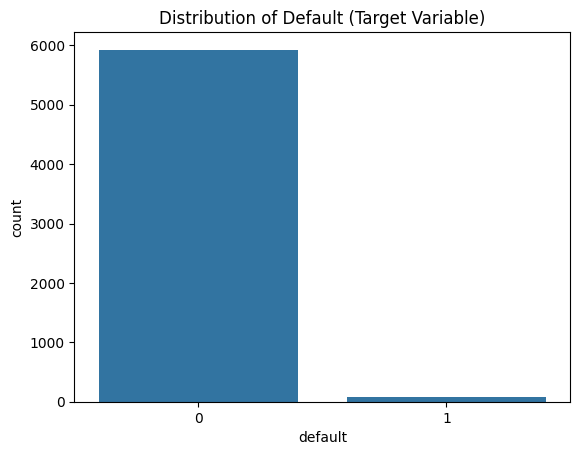

In [57]:
# Showing target distribution
sns.countplot(data=df, x='default')
plt.title("Distribution of Default (Target Variable)")
plt.show()

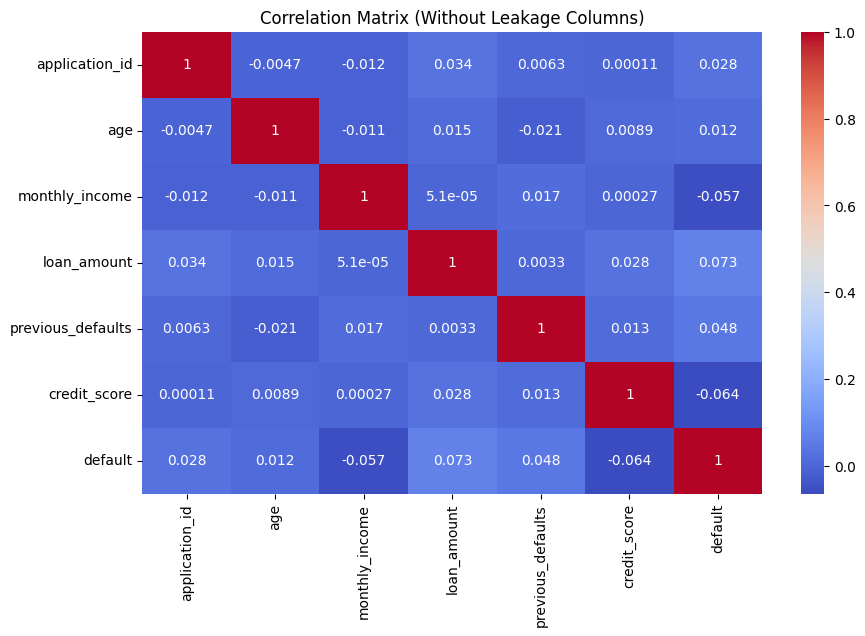

In [58]:
# Correlation numeric feature
numeric_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns=['leak_col_good', 'leak_col_subtle'], errors='ignore')
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Without Leakage Columns)")
plt.show()

In [59]:
# Drop fitur leakage
df_clean = df.drop(columns=['leak_col_good', 'leak_col_subtle'])

In [60]:
df_clean.head()

,application_id,age,monthly_income,loan_amount,previous_defaults,credit_score,default
0,501000,41,13995609,5982664,0,624,0
1,501001,58,13683833,3711198,0,809,0
2,501002,33,9417391,7172332,0,647,0
3,501003,45,6861811,8661056,0,450,0
4,501004,22,5640742,4520669,1,816,0


In [61]:
# Save cleaned data
df_clean.to_csv("../data/credit_scoring_cleaned.csv", index=False)

#### B. Baseline Logistic Reg -> GradientBoosting 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Prepare features and target
X = df_clean.drop(columns=['application_id', 'default'])
y = df_clean['default']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
y_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_proba_gb = gb.predict_proba(X_test)[:, 1]

# Evaluation for Logistic Regression
print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_logreg))
print("ROC AUC Score (Logistic Regression):", roc_auc_score(y_test, y_proba_logreg))

# Evaluation for Gradient Boosting
print("\nConfusion Matrix (Gradient Boosting):\n", confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report (Gradient Boosting):\n", classification_report(y_test, y_pred_gb))
print("ROC AUC Score (Gradient Boosting):", roc_auc_score(y_test, y_proba_gb))


Confusion Matrix (Logistic Regression):
 [[1184    0]
 [  16    0]]

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1184
           1       0.00      0.00      0.00        16

    accuracy                           0.99      1200
   macro avg       0.49      0.50      0.50      1200
weighted avg       0.97      0.99      0.98      1200

ROC AUC Score (Logistic Regression): 0.808277027027027

Confusion Matrix (Gradient Boosting):
 [[1178    6]
 [  15    1]]

Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1184
           1       0.14      0.06      0.09        16

    accuracy                           0.98      1200
   macro avg       0.57      0.53      0.54      1200
weighted avg       0.98      0.98      0.98      1200

ROC AUC Score (Gradient Boosting): 0.7037848395270271


c:\Users\kamil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kamil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kamil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [44]:
# Splitting data
X = df_clean.drop(columns=['default', 'application_id'])
y = df_clean['default']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.2, stratify= y, random_state=42
)

# Standarization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Baseline Logistic Regression
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [46]:
# fit model initiation
logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train_scaled, y_train)

# prediction and probability
y_pred_lr = logreg.predict(X_test_scaled)
y_proba_lr = logreg.predict_proba(X_test_scaled) [:, 1]

# evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_lr))

Confusion Matrix:
 [[873 312]
 [  6   9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.74      0.85      1185
           1       0.03      0.60      0.05        15

    accuracy                           0.73      1200
   macro avg       0.51      0.67      0.45      1200
weighted avg       0.98      0.73      0.84      1200

ROC AUC Score: 0.7574120956399437


In [47]:
from sklearn.ensemble import GradientBoostingClassifier

# Inisiasi dan fit model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Prediksi & Probabilitas
y_pred_gb = gb.predict(X_test)
y_proba_gb = gb.predict_proba(X_test)[:, 1]

# Evaluasi
print("Confusion Matrix (GB):\n", confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report (GB):\n", classification_report(y_test, y_pred_gb))
print("ROC AUC Score (GB):", roc_auc_score(y_test, y_proba_gb))


Confusion Matrix (GB):
 [[1183    2]
 [  15    0]]

Classification Report (GB):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1185
           1       0.00      0.00      0.00        15

    accuracy                           0.99      1200
   macro avg       0.49      0.50      0.50      1200
weighted avg       0.98      0.99      0.98      1200

ROC AUC Score (GB): 0.6863009845288326


In [76]:
# Using SMOT and GridSearch CV

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import pandas as pd

SEED = 42

X = df_clean.drop(columns=["default", "application_id"])
y = df_clean["default"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=SEED)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=SEED)),
    ('gbc', GradientBoostingClassifier(random_state=SEED))
])

param_grid = {
    'gbc__n_estimators': [100, 300],
    'gbc__learning_rate': [0.01, 0.05],
    'gbc__max_depth': [3, 5],
    'gbc__subsample': [0.8, 1.0]
}

grid = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

y_proba = grid.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.3).astype(int)

print("Best Params:", grid.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Best Params: {'gbc__learning_rate': 0.01, 'gbc__max_depth': 3, 'gbc__n_estimators': 300, 'gbc__subsample': 0.8}
Confusion Matrix:
 [[755 430]
 [  6   9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.64      0.78      1185
           1       0.02      0.60      0.04        15

    accuracy                           0.64      1200
   macro avg       0.51      0.62      0.41      1200
weighted avg       0.98      0.64      0.77      1200

ROC AUC Score: 0.6661884669479606


In [79]:
# Using SMOTETomek and GridSearchCV

import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from imblearn.combine import SMOTETomek

SEED = 42

X = df_clean.drop(columns=["default", "application_id"])
y = df_clean["default"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=SEED
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTETomek(random_state=SEED)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

sample_weight = compute_sample_weight(class_weight='balanced', y=y_resampled)

param_grid = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(
    GradientBoostingClassifier(random_state=SEED),
    param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

grid.fit(X_resampled, y_resampled, sample_weight=sample_weight)

y_proba = grid.predict_proba(X_test_scaled)[:, 1]
threshold = 0.3
y_pred = (y_proba >= threshold).astype(int)

print("Best Params:", grid.best_params_)
print("\nConfusion Matrix (threshold=0.3):\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Best Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}

Confusion Matrix (threshold=0.3):
 [[1072  113]
 [  13    2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94      1185
           1       0.02      0.13      0.03        15

    accuracy                           0.90      1200
   macro avg       0.50      0.52      0.49      1200
weighted avg       0.98      0.90      0.93      1200

ROC AUC Score: 0.5114486638537271


In [80]:
# Using XGB Classifier

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import pandas as pd

SEED = 42

X = df_clean.drop(columns=["default", "application_id"])
y = df_clean["default"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=SEED)

neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale = neg / pos

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=SEED)),
    ('xgb', XGBClassifier(
        objective='binary:logistic',
        eval_metric='auc',
        use_label_encoder=False,
        scale_pos_weight=scale,
        random_state=SEED
    ))
])

param_grid = {
    'xgb__n_estimators': [100, 300],
    'xgb__learning_rate': [0.01, 0.05],
    'xgb__max_depth': [3, 5],
    'xgb__subsample': [0.8, 1.0]
}

grid = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

y_proba = grid.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.3).astype(int)

print("Best Params:", grid.best_params_)
print("\nConfusion Matrix (threshold=0.3):\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


c:\Users\kamil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:49:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'xgb__learning_rate': 0.01, 'xgb__max_depth': 5, 'xgb__n_estimators': 300, 'xgb__subsample': 0.8}

Confusion Matrix (threshold=0.3):
 [[598 587]
 [  7   8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.50      0.67      1185
           1       0.01      0.53      0.03        15

    accuracy                           0.51      1200
   macro avg       0.50      0.52      0.35      1200
weighted avg       0.98      0.51      0.66      1200

ROC AUC Score: 0.6117018284106892


In [81]:
# Combining Logistic Reg + XGBoost using Voting Classifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pandas as pd

SEED = 42

X = df_clean.drop(columns=["default", "application_id"])
y = df_clean["default"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=SEED
)

logreg = LogisticRegression(class_weight='balanced', random_state=SEED, max_iter=1000)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=SEED)

voting_clf = VotingClassifier(
    estimators=[
        ('lr', logreg),
        ('xgb', xgb)
    ],
    voting='soft'
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=SEED)),
    ('voting', voting_clf)
])

param_grid = {
    'voting__xgb__n_estimators': [100, 300],
    'voting__xgb__learning_rate': [0.01, 0.05],
    'voting__xgb__max_depth': [3, 5],
    'voting__xgb__subsample': [0.8, 1.0]
}

grid = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

y_proba = grid.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.3).astype(int)

print("Best Params:", grid.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


c:\Users\kamil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:53:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'voting__xgb__learning_rate': 0.01, 'voting__xgb__max_depth': 5, 'voting__xgb__n_estimators': 100, 'voting__xgb__subsample': 1.0}
Confusion Matrix:
 [[683 502]
 [  5  10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.58      0.73      1185
           1       0.02      0.67      0.04        15

    accuracy                           0.58      1200
   macro avg       0.51      0.62      0.38      1200
weighted avg       0.98      0.58      0.72      1200

ROC AUC Score: 0.7160618846694795


In [82]:
# Combining + decreasing false positive

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pandas as pd
import numpy as np

SEED = 42

X = df_clean.drop(columns=["default", "application_id"])
y = df_clean["default"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=SEED
)

logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=SEED)
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),  
    random_state=SEED
)

voting_clf = VotingClassifier(
    estimators=[
        ('lr', logreg),
        ('xgb', xgb)
    ],
    voting='soft'
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=SEED)),
    ('voting', voting_clf)
])

param_grid = {
    'voting__xgb__n_estimators': [100],
    'voting__xgb__learning_rate': [0.01],
    'voting__xgb__max_depth': [3],
    'voting__xgb__subsample': [1.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

grid = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=cv, n_jobs=-1)
grid.fit(X_train, y_train)

y_proba = grid.predict_proba(X_test)[:, 1]

best_f1 = 0
best_thresh = 0.5
for t in np.arange(0.1, 0.9, 0.05):
    y_pred_temp = (y_proba >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_temp).ravel()
    f1 = 2 * tp / (2 * tp + fp + fn + 1e-9)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

y_pred = (y_proba >= best_thresh).astype(int)

print(f"Best Threshold: {best_thresh:.2f}")
print("Best Params:", grid.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

c:\Users\kamil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:06:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Threshold: 0.85
Best Params: {'voting__xgb__learning_rate': 0.01, 'voting__xgb__max_depth': 3, 'voting__xgb__n_estimators': 100, 'voting__xgb__subsample': 1.0}
Confusion Matrix:
 [[1082  103]
 [   9    6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95      1185
           1       0.06      0.40      0.10        15

    accuracy                           0.91      1200
   macro avg       0.52      0.66      0.52      1200
weighted avg       0.98      0.91      0.94      1200

ROC AUC Score: 0.710379746835443
